# Predicting Chronic Kidney Disease Project:

This kidney disease machine learning project is aimed at predicting a risk score..... CKD is a prevalent and serious health condition. There are about 37 million people in the United States who have Chronic Kidney Disease (CKD). 


### By Andrea Hobby 

### BlackInDataWeek23


# Import Libraries

In [1]:
import pandas as pd 
import os
import numpy as np
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
%matplotlib inline

## Read in Data

In [2]:
# change the current directory
# to specified directory
os.chdir(r"C:\Users\andre\Documents\Kidney Project")


In [3]:
# Read in datasets from my directory
df = pd.read_csv('casedata.csv')

## Inspect data

In [4]:
df.head()

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8819 non-null   int64  
 1   Age               8819 non-null   int64  
 2   Female            8819 non-null   int64  
 3   Racegrp           8819 non-null   object 
 4   Educ              8799 non-null   float64
 5   Unmarried         8367 non-null   float64
 6   Income            7653 non-null   float64
 7   CareSource        8819 non-null   object 
 8   Insured           8706 non-null   float64
 9   Weight            8625 non-null   float64
 10  Height            8628 non-null   float64
 11  BMI               8529 non-null   float64
 12  Obese             8529 non-null   float64
 13  Waist             8505 non-null   float64
 14  SBP               8511 non-null   float64
 15  DBP               8439 non-null   float64
 16  HDL               8802 non-null   float64


In [6]:
#checking for missing values
df.isnull().sum()

ID                     0
Age                    0
Female                 0
Racegrp                0
Educ                  20
Unmarried            452
Income              1166
CareSource             0
Insured              113
Weight               194
Height               191
BMI                  290
Obese                290
Waist                314
SBP                  308
DBP                  380
HDL                   17
LDL                   18
Total Chol            16
Dyslipidemia           0
PVD                    0
Activity              10
PoorVision           567
Smoker                 0
Hypertension          80
Fam Hypertension       0
Diabetes               2
Fam Diabetes           0
Stroke                11
CVD                   23
Fam CVD              419
CHF                   36
Anemia                 6
CKD                 2819
dtype: int64

In [7]:
df.describe()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
count,8819.000000,8819.000000,8819.000000,8799.000000,8367.000000,7653.000000,8706.000000,8625.000000,8628.000000,8529.000000,...,8739.000000,8819.000000,8817.000000,8819.000000,8808.000000,8796.000000,8400.000000,8783.00000,8813.000000,6000.000000
mean,4410.000000,49.358204,0.527271,0.431413,0.368591,0.417222,0.804503,79.094342,167.026854,28.294348,...,0.401419,0.233246,0.111376,0.311713,0.031449,0.066394,0.343214,0.02892,0.020424,0.077333
std,2545.970345,18.828726,0.499284,0.495302,0.482452,0.493132,0.396606,19.410707,10.099770,6.186076,...,0.490213,0.422922,0.314615,0.463220,0.174537,0.248983,0.474811,0.16759,0.141455,0.267142
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.600000,130.400000,12.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2205.500000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.400000,159.675000,24.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4410.000000,47.000000,1.000000,0.000000,0.000000,0.000000,1.000000,76.700000,166.600000,27.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6614.500000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.500000,174.200000,31.360000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,8819.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193.300000,200.100000,66.440000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
#check for class imbalance in target variable
class_counts = df['CKD'].value_counts()


print(class_counts)

0.0    5536
1.0     464
Name: CKD, dtype: int64


<AxesSubplot:>

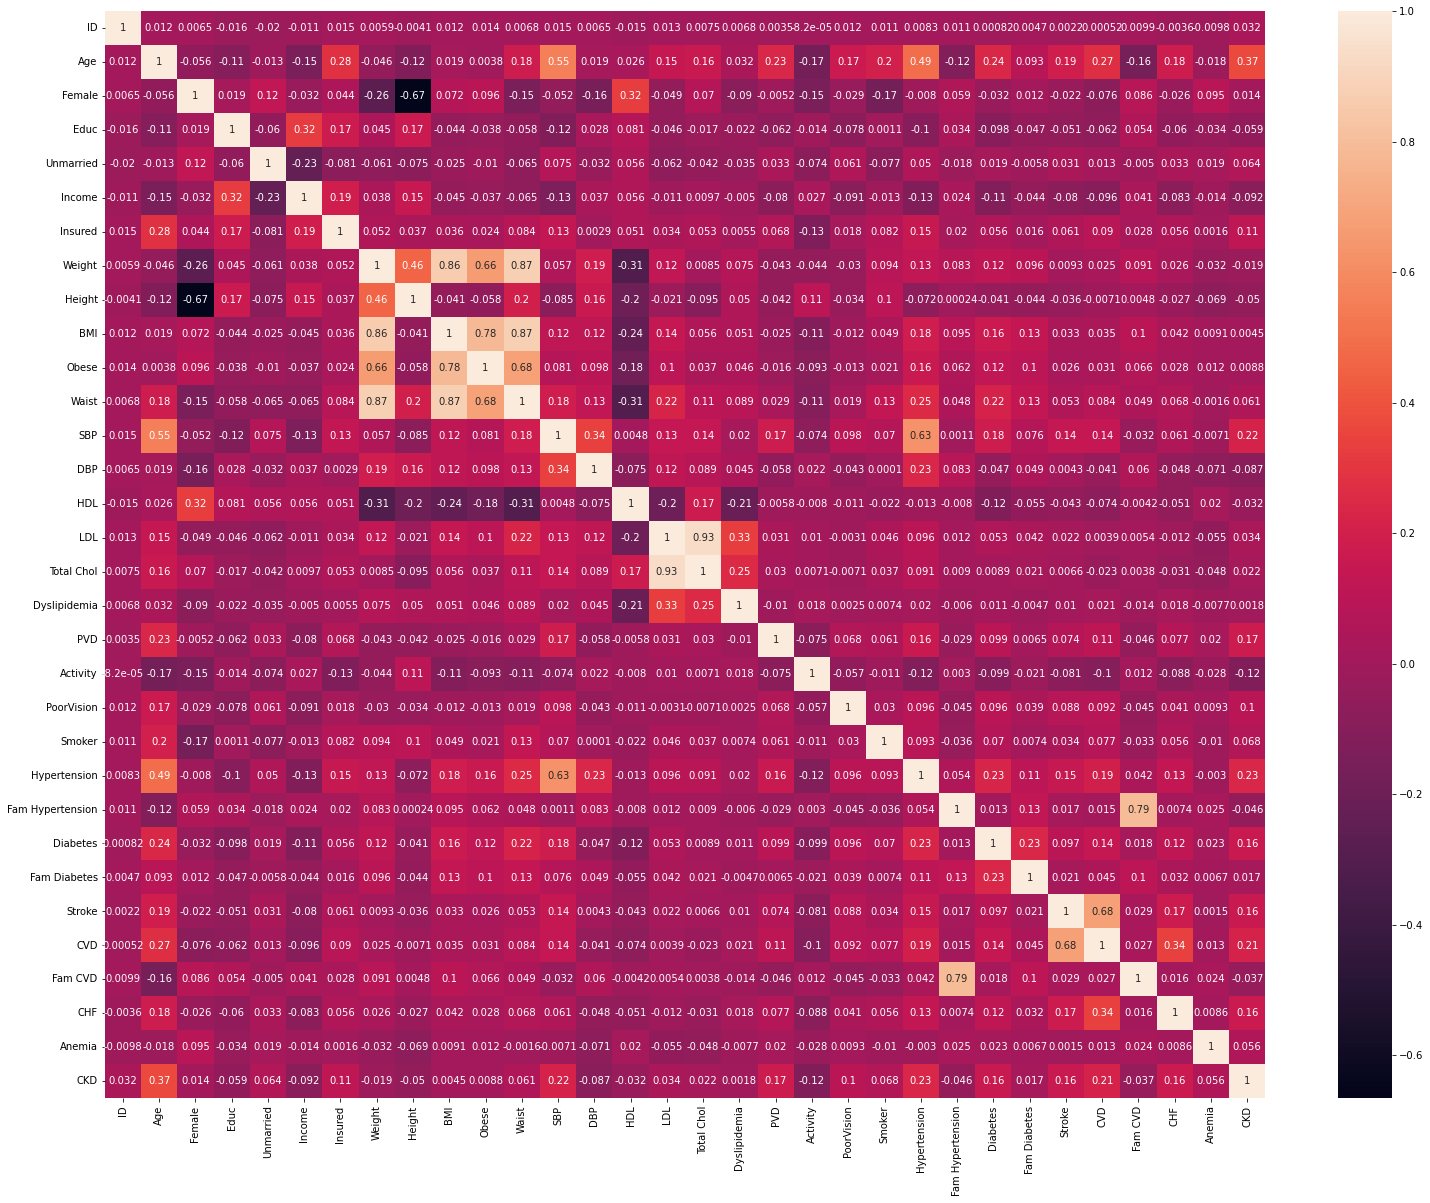

In [9]:
# Let's see the correlation matrix 
plt.figure(figsize = (26,20))     # Size of the figure
sns.heatmap(df.corr(),annot = True)

## Data Processing  and Feature Selection 

In [10]:
# Drop irrelevant or redudant columns 
df_drop = df.drop(['ID', 'Weight', 'Height', 'Obese', 'Waist'], axis=1)



In [11]:

# Define the age bins
bins = [18, 35, 50, 65, 85]

# Define the bin labels
labels = ['18-34', '35-49', '50-64', '65 and older']

# Convert the age variable into a categorical variable
df_drop['age_group'] = pd.cut(df_drop['Age'], bins=bins, labels=labels)

# View the resulting DataFrame
print(df_drop)


      Age  Female Racegrp  Educ  Unmarried  Income CareSource  Insured    BMI  \
0      65       1   white   0.0        0.0     1.0      other      1.0  21.31   
1      36       1   hispa   0.0        NaN     1.0    noplace      0.0  22.88   
2      66       1   white   0.0        1.0     0.0    noplace      1.0  31.77   
3      54       1   white   1.0        0.0     0.0      DrHMO      1.0  26.94   
4      63       1   black   0.0        0.0     NaN     clinic      1.0  28.84   
...   ...     ...     ...   ...        ...     ...        ...      ...    ...   
8814   32       1   white   1.0        0.0     1.0      DrHMO      1.0  28.28   
8815   77       1   white   0.0        1.0     0.0     clinic      1.0  26.70   
8816   56       1   white   0.0        0.0     NaN      DrHMO      1.0  18.62   
8817   25       1   black   0.0        1.0     NaN     clinic      0.0  33.52   
8818   60       0   black   0.0        1.0     0.0    noplace      1.0  26.44   

        SBP  ...  Fam Hyper

In [12]:
bins = [0, 25, 30, 100]

# Define the bin labels
labels = ['Normal', 'Overweight', 'Obese']

# Convert the BMI variable into a categorical variable
df_drop['BMI_group'] = pd.cut(df_drop['BMI'], bins=bins, labels=labels)

# View the resulting DataFrame
print(df_drop)

      Age  Female Racegrp  Educ  Unmarried  Income CareSource  Insured    BMI  \
0      65       1   white   0.0        0.0     1.0      other      1.0  21.31   
1      36       1   hispa   0.0        NaN     1.0    noplace      0.0  22.88   
2      66       1   white   0.0        1.0     0.0    noplace      1.0  31.77   
3      54       1   white   1.0        0.0     0.0      DrHMO      1.0  26.94   
4      63       1   black   0.0        0.0     NaN     clinic      1.0  28.84   
...   ...     ...     ...   ...        ...     ...        ...      ...    ...   
8814   32       1   white   1.0        0.0     1.0      DrHMO      1.0  28.28   
8815   77       1   white   0.0        1.0     0.0     clinic      1.0  26.70   
8816   56       1   white   0.0        0.0     NaN      DrHMO      1.0  18.62   
8817   25       1   black   0.0        1.0     NaN     clinic      0.0  33.52   
8818   60       0   black   0.0        1.0     0.0    noplace      1.0  26.44   

        SBP  ...  Diabetes 

In [13]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               8819 non-null   int64   
 1   Female            8819 non-null   int64   
 2   Racegrp           8819 non-null   object  
 3   Educ              8799 non-null   float64 
 4   Unmarried         8367 non-null   float64 
 5   Income            7653 non-null   float64 
 6   CareSource        8819 non-null   object  
 7   Insured           8706 non-null   float64 
 8   BMI               8529 non-null   float64 
 9   SBP               8511 non-null   float64 
 10  DBP               8439 non-null   float64 
 11  HDL               8802 non-null   float64 
 12  LDL               8801 non-null   float64 
 13  Total Chol        8803 non-null   float64 
 14  Dyslipidemia      8819 non-null   int64   
 15  PVD               8819 non-null   int64   
 16  Activity          8809 n

In [14]:
# one hot encoding 
# Identify categorical variables
# Select categorical variables
cat_vars = df_drop.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical variables
print(cat_vars)

['Racegrp', 'CareSource']


In [15]:
# Apply one-hot encoding to categorical variables
df_dummies = pd.get_dummies(df_drop, columns=cat_vars)
print(df_dummies)

      Age  Female  Educ  Unmarried  Income  Insured    BMI    SBP   DBP   HDL  \
0      65       1   0.0        0.0     1.0      1.0  21.31  135.0  71.0  48.0   
1      36       1   0.0        NaN     1.0      0.0  22.88   96.0  52.0  31.0   
2      66       1   0.0        1.0     0.0      1.0  31.77  115.0  57.0  44.0   
3      54       1   1.0        0.0     0.0      1.0  26.94  110.0  57.0  74.0   
4      63       1   0.0        0.0     NaN      1.0  28.84  132.0  73.0  67.0   
...   ...     ...   ...        ...     ...      ...    ...    ...   ...   ...   
8814   32       1   1.0        0.0     1.0      1.0  28.28    NaN   NaN  53.0   
8815   77       1   0.0        1.0     0.0      1.0  26.70  157.0  44.0  87.0   
8816   56       1   0.0        0.0     NaN      1.0  18.62  126.0  81.0  61.0   
8817   25       1   0.0        1.0     NaN      0.0  33.52    NaN   NaN  75.0   
8818   60       0   0.0        1.0     0.0      1.0  26.44  133.0  75.0  71.0   

      ...   BMI_group  Race

In [16]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 8819 non-null   int64   
 1   Female              8819 non-null   int64   
 2   Educ                8799 non-null   float64 
 3   Unmarried           8367 non-null   float64 
 4   Income              7653 non-null   float64 
 5   Insured             8706 non-null   float64 
 6   BMI                 8529 non-null   float64 
 7   SBP                 8511 non-null   float64 
 8   DBP                 8439 non-null   float64 
 9   HDL                 8802 non-null   float64 
 10  LDL                 8801 non-null   float64 
 11  Total Chol          8803 non-null   float64 
 12  Dyslipidemia        8819 non-null   int64   
 13  PVD                 8819 non-null   int64   
 14  Activity            8809 non-null   float64 
 15  PoorVision          8252 non-null   fl

In [17]:
uint82flt = df_dummies.select_dtypes(include=['uint8']).columns.tolist()

def convert_to_float(df, column_list):
    for col in column_list:
        df[col] = df[col].astype('float64')
    return df

new_df = convert_to_float(df_dummies, uint82flt)

In [18]:
#category columns

new_df['age_group_flt'] = new_df['age_group'].astype('category').cat.codes.astype('float64')
new_df['BMI_group_flt'] = new_df['BMI_group'].astype('category').cat.codes.astype('float64')

new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 8819 non-null   int64   
 1   Female              8819 non-null   int64   
 2   Educ                8799 non-null   float64 
 3   Unmarried           8367 non-null   float64 
 4   Income              7653 non-null   float64 
 5   Insured             8706 non-null   float64 
 6   BMI                 8529 non-null   float64 
 7   SBP                 8511 non-null   float64 
 8   DBP                 8439 non-null   float64 
 9   HDL                 8802 non-null   float64 
 10  LDL                 8801 non-null   float64 
 11  Total Chol          8803 non-null   float64 
 12  Dyslipidemia        8819 non-null   int64   
 13  PVD                 8819 non-null   int64   
 14  Activity            8809 non-null   float64 
 15  PoorVision          8252 non-null   fl

In [19]:
# Drop variables that have categories 
new_array = new_df.drop(['Age', 'BMI', 'age_group', 'BMI_group'], axis=1)





In [20]:
new_array.isnull().sum()

Female                   0
Educ                    20
Unmarried              452
Income                1166
Insured                113
SBP                    308
DBP                    380
HDL                     17
LDL                     18
Total Chol              16
Dyslipidemia             0
PVD                      0
Activity                10
PoorVision             567
Smoker                   0
Hypertension            80
Fam Hypertension         0
Diabetes                 2
Fam Diabetes             0
Stroke                  11
CVD                     23
Fam CVD                419
CHF                     36
Anemia                   6
CKD                   2819
Racegrp_black            0
Racegrp_hispa            0
Racegrp_other            0
Racegrp_white            0
CareSource_              0
CareSource_DrHMO         0
CareSource_clinic        0
CareSource_noplace       0
CareSource_other         0
age_group_flt            0
BMI_group_flt            0
dtype: int64

In [21]:
# drop NaN
# Drop rows with NaN in the target column
ckdarray = new_array.dropna(inplace=True)

In [22]:

X = new_array.drop(['CKD'], axis=1)
y = new_array['CKD']

#undesampling 

from imblearn.under_sampling import RandomUnderSampler

# X and y are your feature and target variables, respectively
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)




In [23]:
# Split the data into training and testing sets
X = new_array.drop(['CKD'], axis=1)
y = new_array['CKD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling

In [24]:

# Define the hyperparameters to tune
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5]}

# Define the decision tree classifier
tree = DecisionTreeClassifier()

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the decision tree model with the best hyperparameters
tree2 = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'])
tree2.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree2.predict(X_test)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


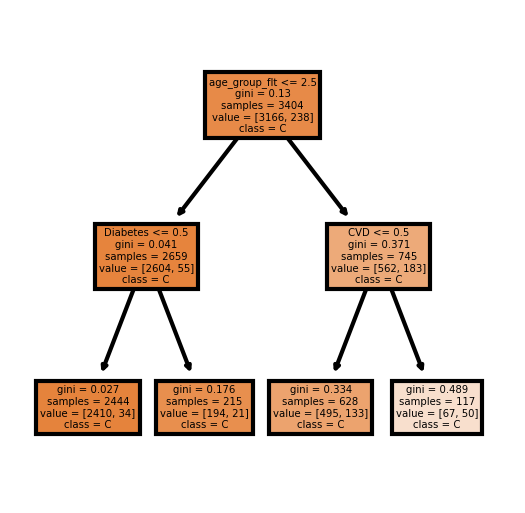

In [32]:
from sklearn import tree

# Get the feature names
column_names = X.columns.tolist()
 


# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

tree.plot_tree(tree2,
           feature_names = column_names, 
           class_names='CKD',
           filled = True);

# Save Plot
fig.savefig('decisiontree.png')

## Modeling Evaluation 

In [35]:

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9354460093896714
Confusion Matrix:
 [[797   0]
 [ 55   0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       797
         1.0       0.00      0.00      0.00        55

    accuracy                           0.94       852
   macro avg       0.47      0.50      0.48       852
weighted avg       0.88      0.94      0.90       852



C:\Users\andre\Anaconda2021\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\Anaconda2021\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\Anaconda2021\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature Importance

In [34]:
# Combine the feature names and importances into a list of tuples
feature_importances = list(zip(column_names, importances))

# Sort the list of tuples by importance (in descending order)
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print the feature importances in descending order
for feature, importance in feature_importances:
    print(feature, importance)

age_group_flt 0.8314564161250557
CVD 0.1293969807452926
Diabetes 0.039146603129651625
Female 0.0
Educ 0.0
Unmarried 0.0
Income 0.0
Insured 0.0
SBP 0.0
DBP 0.0
HDL 0.0
LDL 0.0
Total Chol 0.0
Dyslipidemia 0.0
PVD 0.0
Activity 0.0
PoorVision 0.0
Smoker 0.0
Hypertension 0.0
Fam Hypertension 0.0
Fam Diabetes 0.0
Stroke 0.0
Fam CVD 0.0
CHF 0.0
Anemia 0.0
Racegrp_black 0.0
Racegrp_hispa 0.0
Racegrp_other 0.0
Racegrp_white 0.0
CareSource_  0.0
CareSource_DrHMO 0.0
CareSource_clinic 0.0
CareSource_noplace 0.0
CareSource_other 0.0
BMI_group_flt 0.0
